## Chapter 3: Training of Neural Networks

We now showed you how an ANN is configured, what its properites are and how these properties can be related to an approximation. Essentially, Deep Learning algorithms are `supervised learning functions`. That is, the algorithms learn what the underlying relationship of the data approximately is and then attempt to approximate and generalise this relationship.



In order to quantify and improve the effectivness of the underlying approximation, neural networks follow a distinct learning process.

This learning process is closely linked to the paradigms of the classical learning theory and indeed incorporate many of its components. Hence, in order for a neural network algorithm to cotninuously learn and improve, we need to consider the following topcis:

1. Loss Functions
2. Data Splitting
3. Cross-Validation




#### 3.1: Loss functions

As we discussed previously, the step of approximating an underlying relationship is executed through an **iterative connection of nonlinear transformations of affine functions** throughout the hidden layers of the neural network. Then, in the output layer, the calculated and transformed functional values are put through a soft maximiser function (such as the softmax function) to **determine the class probability of the resulting output**.

Hence, in order to quantify the effectiveness, or success, to approximate the underlying relationship of a neural network, we need some type of function which compares the actual output values with the approximated values. This is defined through a so-called `Loss function`.  

A loss function is a mathematical function that quantifies the difference between predicted and actual values in a machine learning model. It measures the model performance and guides the optimization process by providing feedback on how well it fits the data. The most common, and basic, loss function we usually encounter is called the `Sum of Squared Residuals (SSR)` and is usually used in the classical (linear) regression problem where we attempt to minimise the sum of the squared distances between each observed and approximated datapoint.

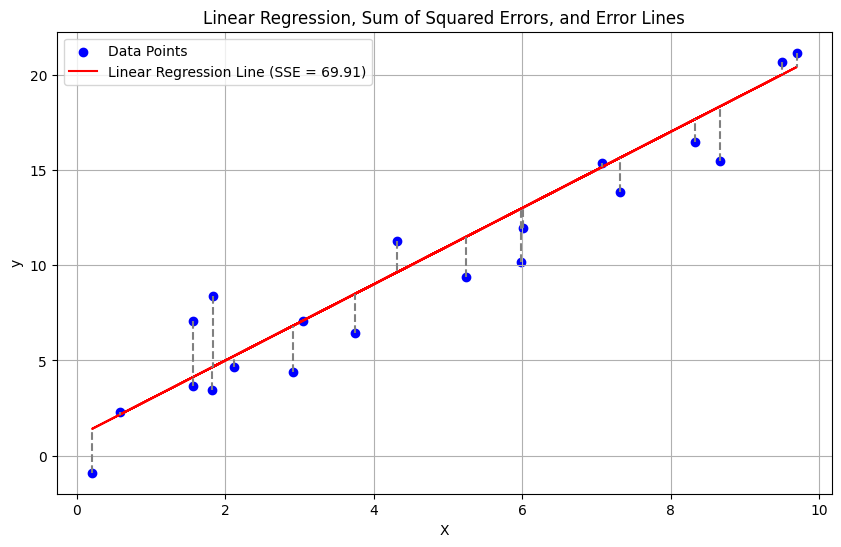

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data points
np.random.seed(42)
X = np.random.rand(20) * 10
y = 2 * X + 1 + np.random.randn(20) * 2  # Adding some noise

# Linear regression parameters
slope = 2
intercept = 1

# Predicted values using the linear regression line
y_pred = slope * X + intercept

# Calculate the sum of squared errors (SSE)
sse = np.sum((y - y_pred) ** 2)

# Plot the data points, linear regression line, and error lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label=f'Linear Regression Line (SSE = {sse:.2f})', color='red')

for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='gray', linestyle='dashed')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression, Sum of Squared Errors, and Error Lines')
plt.legend()
plt.grid(True)
plt.show()


As in the example of the SSR in linear regression, it is our aim to minimise the respective loss function as such a minimisation increases the success of our model in approximating the underlying relationship.

##### 3.1.1: Types of Loss functions

In supervised learning, there are two main types of loss functions.

1. **Regression Loss Functions**
  - Given an input value, the model predicts a corresponding output value
  - Examples: Mean Squared Error, Mean Absolute Error

2. **Classification Loss Functions**
  - Given an input, the neural network produces a vector of probabilities of the input belonging to classes and then selects the class with the highest probability
  - Examples: Binary Cross-Entropy, Categorical Cross-Entropy

###### 3.1.1.1: Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common metric used to measure the average squared difference between predicted values and actual target values in regression problems. It provides a way to quantify the overall quality of a regression model's predictions by penalizing larger errors more than smaller ones.

The formula for the MSE is the following:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

###### 3.1.1.2: Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is a metric commonly used to measure the average absolute difference between predicted values and actual target values in regression problems. Unlike the Mean Squared Error (MSE), the MAE does not square the differences, which means it treats positive and negative errors equally and is less sensitive to outliers.

The formula for the MAE is the following:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$


###### 3.1.1.3: Huber Loss

The Huber loss is a loss function used in regression problems that combines the characteristics of both Mean Squared Error (MSE) and Mean Absolute Error (MAE). It provides a balance between the robustness of MAE and the differentiability of MSE. The Huber loss is less sensitive to outliers compared to MSE but still maintains smoothness for optimization.

The forumla for the Huber Loss is the following

$$
HuberLoss = \frac{1}{n} \sum_{i=1}^{n} \begin{cases}
      \frac{1}{2}(y_i - \hat{y}_i)^2 & \text{if } |y_i - \hat{y}_i| \leq \delta \\
      \delta |y_i - \hat{y}_i| - \frac{1}{2}\delta^2 & \text{otherwise}
   \end{cases}
$$

Let's examine the factor $\delta$. It is the threshold parameter that determines when the loss transitions from quadratic (MSE-like) to linear (MAE-like).

Consequently, the Huber Loss involves two cases:

  - If the absolute difference $|y_i - \hat{y}_i|$ is smaller than or equal to the threshold $\delta$, the loss is the squared error $\frac{1}{2}(y_i - \hat{y}_i)^2$.
    
  - If the absolute difference is greater than $\delta$, the loss is a linear combination of the absolute error $|y_i - \hat{y}_i|$ and a constant term $-\frac{1}{2}\delta^2$.


Let's show you an example where $\delta$ = 1

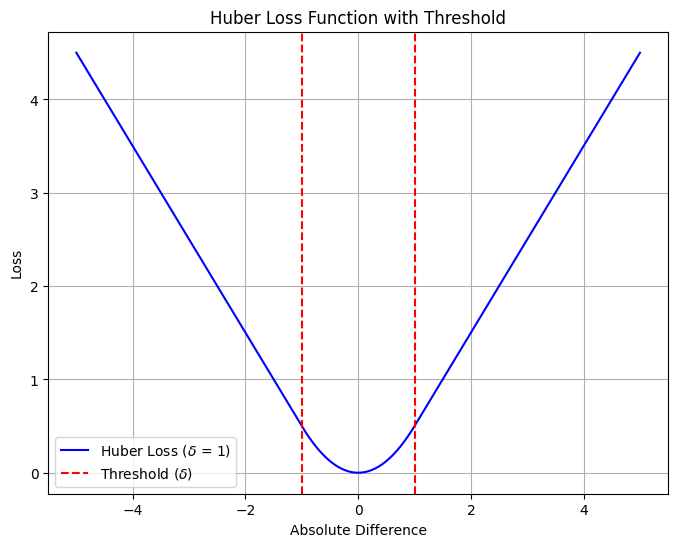

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def huber_loss(delta, absolute_diff):
    return np.where(absolute_diff <= delta, 0.5 * np.square(absolute_diff), delta * absolute_diff - 0.5 * np.square(delta))

# Values for plotting
delta = 1
absolute_diff = np.linspace(-5, 5, 400)

# Calculate Huber loss values
loss_values = huber_loss(delta, np.abs(absolute_diff))

# Plot the Huber loss function
plt.figure(figsize=(8, 6))
plt.plot(absolute_diff, loss_values, label=f'Huber Loss ($\delta$ = {delta})', color='blue')
plt.axvline(x=delta, color='red', linestyle='dashed', label=f'Threshold ($\delta$)')
plt.axvline(x=-delta, color='red', linestyle='dashed')
plt.xlabel('Absolute Difference')
plt.ylabel('Loss')
plt.title('Huber Loss Function with Threshold')
plt.legend()
plt.grid(True)
plt.show()


###### 3.1.1.4: Binary Cross Entropy Loss

The Binary Cross Entropy (BCE) loss, also known as the log loss or logistic loss, is a commonly used loss function in binary classification tasks. It measures the dissimilarity between predicted probabilities and true binary labels. The BCE loss is suitable for problems where each instance belongs to one of two classes, and the goal is to predict the probability that an instance belongs to the positive class.

In binary classification, the BCE loss for a single instance is defined as:

$$
BCE(\hat{y}, y) = - y \cdot \log(\hat{y}) - (1 - y) \cdot \log(1 - \hat{y})
$$

Where:
- $\hat{y}$ is the predicted probability of the positive class.
- y is the true binary label (0 for the negative class, 1 for the positive class).
- $\log$ is the natural logarithm.

The BCE loss combines two terms:
1. $( - y \cdot \log(\hat{y}))$: This term penalizes predictions when the true label is positive y = 1. It increases as the predicted probability $\hat{y}$ deviates from 1.
2. $( - (1 - y) \cdot \log(1 - \hat{y})$: This term penalizes predictions when the true label is negative y = 0. It increases as the predicted probability $\hat{y}$ deviates from 0.

The BCE loss function encourages the model to predict high probabilities for positive instances and low probabilities for negative instances. It can be interpreted as the negative log-likelihood of the true label under the predicted distribution.


###### 3.1.1.5: Categorical Cross Entropy Loss

The Categorical Cross Entropy (CCE) loss is a widely used loss function in multiclass classification tasks. It measures the dissimilarity between predicted class probabilities and true class labels. Generally speaking, it is a **softmax activation plus a Cross-Entropy loss**.

The CCE loss is suitable for problems where each instance can belong to one of multiple classes, and the goal is to predict the class probabilities for each instance.

In multiclass classification, the CCE loss for a single instance is defined as:

$$
\text{CCE}(\hat{y}, y) = - \sum_{i=1}^{C} y_i \cdot \log(\hat{y}_i)
$$

Where:
- $\hat{y}_i$ is the predicted probability of class i.
- $y_i$ is the true probability distribution over classes, represented as a one-hot encoded vector.
- c is the number of classes.

The CCE loss calculates the negative log-likelihood of the true class label under the predicted class probabilities. It penalizes predictions that deviate from the true distribution of classes.

The formula involves a sum over all classes, where each term $( - y_i \cdot \log(\hat{y}_i))$ contributes to the loss based on the predicted and true probabilities of the class.



Let's quickly calculate the Categorical Cross Entropy Loss in Pytorch

In [ ]:
import torch
import torch.nn.functional as F

# Example data
num_classes = 4
batch_size = 3

# True class labels (one-hot encoded)
y_true = torch.tensor([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
], dtype=torch.float32)

# Predicted class probabilities
y_pred = torch.tensor([
    [0.2, 0.6, 0.1, 0.1],
    [0.1, 0.2, 0.7, 0.0],
    [0.5, 0.3, 0.1, 0.1]
], dtype=torch.float32)

# Calculate Categorical Cross Entropy loss using PyTorch's functional API
cce_loss = F.cross_entropy(y_pred, torch.argmax(y_true, dim=1))

print("Categorical Cross Entropy Loss:", cce_loss.item())



Categorical Cross Entropy Loss: 1.061541199684143


##### 3.1.2: One-Hot Encoding

`One-hot encoding` is a technique used in machine learning to represent **categorical data as binary vectors**. It's particularly useful when dealing with categorical variables in a format that machine learning algorithms can understand.

In one-hot encoding, each unique category is represented as a **vector where only one element is "hot" (set to 1), and all other elements are "cold" (set to 0)**.

This binary representation allows algorithms to work with **categorical data as numerical features**.

Suppose we have a dataset with a categorical variable "Color" that can take values: "Red," "Green," and "Blue."

In [ ]:
import pandas as pd

data = {'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

# Perform one-hot encoding using pandas' get_dummies function
encoded_df = pd.get_dummies(df['Color'])

print(encoded_df)


   Blue  Green  Red
0     0      0    1
1     0      1    0
2     1      0    0
3     0      1    0
4     0      0    1


**One-Hot Encoding Process**

The One-Hot Encoding process can then be distributed into four tasks:

1. Identify Unique Categories:
  - Determine the unique categories in the categorical variable.
  - In this case, we have "Red," "Green," and "Blue."

2. Assign Indices:
  - Assign a unique index to each category.
  - For example, "Red" could be index 0, "Green" index 1, and "Blue" index 2.

3. Convert to One-Hot Vectors:
  - For each data point, create a binary vector with the same length as the number of unique categories.
  - Set the element corresponding to the category's index to 1 and all other elements to 0.

4. Create DataFrame with Encoded Data:
  - Replace the original categorical column with the one-hot encoded vectors.

Let's look at an example in Pytorch

In [ ]:
# Convert categorical data to one-hot encoded tensors using PyTorch
encoded_tensors = torch.nn.functional.one_hot(torch.tensor(df['Color'].astype('category').cat.codes).to(torch.int64), num_classes=len(df['Color'].astype('category').cat.categories))

encoded_df = pd.DataFrame(encoded_tensors.numpy(), columns=df['Color'].astype('category').cat.categories)

print(encoded_df)

   Blue  Green  Red
0     0      0    1
1     0      1    0
2     1      0    0
3     0      1    0
4     0      0    1


- Training vs. Test Set --> Capacity and the general definition
- Cross Validation
- Gradient Descent
- Backpropagation


#### 3.2: Data Splitting

In general, we want to be able to approximate the true underlying relationship of the data. Thus, we want to be able to train our model to provide a best possible generalisation of the data relationship based on the samples we provided it with.

However, an important aspect when modeling the approximation of the underlying relationship lays in the fact that we are never going to be able to see the true underlying relationship of the data. Rather, we approximate it by using a sample of the true data. Thus, we are sampling our model in order to be able to best possibly draw the true underlying relationship. A central caveat here is that the sample we use may have distinct features which diverge from the overall data relationship. Essentially, we may never be certain that the sample we use is actually the best representation of the data. Thus, we are never certain that the model we create is actually useful in providing an approximation to the true underlying relationship.

In order to mitigate such concerns and increase the confidence in the model's generalisation abilities, we perform something which is called `data splitting`.

Data splitting involves splitting the data into `training`, `validation` and `test` data.





##### 3.2.1: Training, Validation and Test Set Data

Training, validation, and test sets are distinct subsets of data used in machine learning for model development, evaluation, and generalization. They play crucial roles in ensuring that a machine learning model is capable of making accurate predictions on new, unseen data.

**Training Set**:

The training set is the portion of the dataset used to train the machine learning model. It contains input features (attributes) and their corresponding target outcomes (labels). During the training process, the model learns patterns and relationships within the training data. The goal is for the model to capture these patterns and be able to make accurate predictions on new, unseen data.

**Validation Set**:

The validation set is a subset of the dataset that is not used for training but is used to tune the hyperparameters of the model and assess its performance during training. Hyperparameters are parameters that are set before training and control aspects of the training process (e.g., learning rate, regularization strength). By evaluating the model's performance on the validation set, you can make informed decisions about hyperparameter settings and detect issues such as overfitting.

**Test Set**:

The test set is a separate subset of data that is not used during training or hyperparameter tuning. It is reserved for evaluating the model's final performance and generalization ability. By evaluating the model on data it has never seen before, you can estimate how well the model is likely to perform on real-world, unseen data. The test set provides an unbiased estimate of the model's performance.



##### 3.2.2: Training and Generalisation Error

In order to quantify the effectiveness of a model, we thus need to split the data into the three distinct categories we defined above. The reasons for this are quite straightforward and relate all to our need for the model to approximate the true underlying relationship of the data. Essentially, we want the model which we configured on the sample to be generalisable to many samples of the data. As such, we must avoid `Data Leakage`. Data Leakage refers to the fact that if you use the same data for both training and validation/test, your model might accidentally learn information specific to that dataset rather than true underlying patterns, ultimately resulting in a biased estimate of your model. By keeping these sets separate, you prevent any leakage of information and ensure unbiased evaluation.

In order to quantify the model's ability to generalise well, we thus need to compare a model's so-called `training error` with its `generalisation error`.

Essentially, the training and generalisation error are simply the errors computed through the respective loss functions throughout the distinct data sets. So the:

- training error quantifies the model's ability to approximate the relationship of the training data
-  generalisation (= test) error quantifies the model's ability top approximate the relationship of the test data

Let's think a little bit more about these concepts. First the training error. The training error is calculated by evaluating the difference between the actual and predicted values in the training set.

##### 3.2.2.1: Model Complexity

Let's first introduce the term `Model Complexity`. Model complexity defines a model's structure. More complex models have a more pronounced structure than simpler models and can thus approximate more complex data structures. Simple examples include larger degrees in polynomial functions. In terms of neural networks, the depth of the model is an important factor to define the complexity.

We need to look at model complexity in order to understand the relationship of the training and generalisation error better.

Let's first look at the **training error**. As we understand it, the training error quantifies the difference between the estimated and actual data in the training set. By increasing the model complexity, we are going to increase its ability to fit the specific sample data, thereby reducing the training error. As a consequence, we understand that **increasing model complexity will nearly always reduce the training error** because it improves its ability to fit a very distinct part of the true underlying relationship.

Now, the **generalisation error** works in a slightly different manner. Recall that we are using new data based on the model configuration of the training data. This new data certainly has some similarities with the training data, but some parts of the data will be different. Consequently, we understand that when the model's ability to approximate the specific sample data increases, unless the new data has the exact same characteristics, its ability to model this new data will diminish eventually as it gradually incorporates more features which are distinct to the training data but not present in the exact same form in the test data. As a consequence, we understand that **increasing model complexity will first reduce and then increase the generalisation eror** as we are first starting to model characteristics which are present in both the training and test data, and then start to model characteristics only present in the training data. This leads to a U-shaped curve of the generalisation error.

##### 3.2.2.2: Underfitting vs. Overfitting

Another way to think about the complexity, training and generalisation error is in terms of `underfitting` and `overfitting` concepts of a model.

In general, we say that a model is underfitting if:

-  It's not fitting the data well enough
-  The complexity of the model is too low to successfully approximate the underlying relationship of the data
- The model does not capture enough signal but no noise

On the contrary, we say that a model is overfitting if:

- It's fitting the data too well
- The complexity of the model is so high that it approximates more than just the underlying relationship of the data
- The model captures enough signal but too much noise

Consequently, as the model increases, we switch from a regime of underfitting to a regime of overfitting.

As we understand, the case of overfitting is nearly never present in the training data as increasing model complexity results in a better fit of a very specific subsample of the data. However, the case of overfitting is very well present in the test data as increasing model complexity results in a fit of features which are not present in the new data, thereby leading to the accumulation of noise.

In general, we can define two cases of model complexity:

- Low complexity: underfit the training data
- High complexity: overfit by memorizing properties of the training set that are not present in the test set

As a consequence, we can think about model complexity, underfitting and overfitting also in terms of the training vs. test error:

- Underfitting: Unable to obtain sufficiently low error value on training set
- Overfitting: Gap between training and testing error is too large



##### 3.2.2.3: Combining Model Complexity, Underfitting, Overfitting and the Training and Generalisation Errors

We now understand that model complexity is associated with the fit of a model. This fit can be underfitting or overfitting, depending on the model's ability to map the sample data and generalise on new data. Therein, we stated that increasing complexity can thus lead to an improved training error while it will first decrease the test set error and re-increase it subsequently.

Summarising the insight provided above, one of the most important results in statistical learning theory shows that the **discrepancy between training error and generalization error is bounded from above** with a quantity that:

- grows as the model capacity grows
- shrinks as the number of training examples increases

We can visualise the relationship as follows:

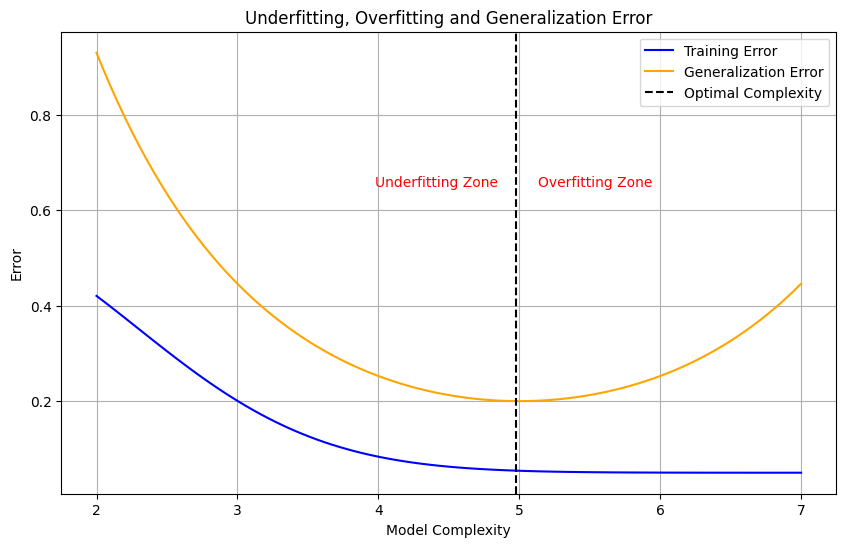

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
model_complexity = np.linspace(2,7, 100)
training_error = 0.5 * np.exp(-0.3 * (model_complexity - 1) ** 2) + 0.05
generalization_error = 0.5 * np.exp(0.1 * (model_complexity - 5) ** 2) - 0.3

# Find optimal complexity (lowest point of generalization error)
optimal_complexity = model_complexity[np.argmin(generalization_error)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(model_complexity, training_error, label='Training Error', color='blue')
plt.plot(model_complexity, generalization_error, label='Generalization Error', color='orange')
plt.axvline(x=optimal_complexity, color='black', linestyle='dashed', label='Optimal Complexity')
plt.text(optimal_complexity - 1, np.min(generalization_error) + 0.45, 'Underfitting Zone', rotation=0, color='red')
plt.text(optimal_complexity + 0.15, np.min(generalization_error) + 0.45, 'Overfitting Zone', rotation=0, color='red')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Underfitting, Overfitting, Model Complexity Generalization Error')
plt.legend()
plt.grid(True)
plt.show()


##### 3.2.3: Bias and Variance Trade-Off

Now that we introduced the concepts of underfitting and overfitting, we can dig deeper into the generalisation error. Doing so, let's recap two important concepts of statistics: `bias` and `variance`.

The bias of an estimator:

- measures the difference between the true value and the expected value
- Any estimator is said to be unbiased if the expected value equals the true value (and asymptotically unbiased if both values asymptotically approach each other as n approaches infinity)
- As such, the bias term **measures the expected deviation from the true value of the function or parameter**

The variance of an estimator (also called standard error):

- provides a measure of how we would expect the estimate we compute from data to vary as we independently resample the dataset from the underlying data generating process

- As such, the variance term **measures the deviation from the expected estimator value that any particular sampling of the data is likely to cause**


##### 3.2.3.1: Trading off Bias and Variance to Minimise the Mean Squared Error

In order to understand the concept of the Bias and Variance terms better, we can show their connection to the MSE. Recall that the MSE is one of the most important metrics to quantify the loss of a neural network model.

The Mean Squared Error (MSE) of the estimates can be expressed in terms of bias and variance using the bias-variance decomposition. The decomposition helps us understand how the MSE of a model's predictions can be broken down into these two components. Recall that the MSE is calculated as the average squared difference between the predicted values and the true values across all data points:

$$
\text{MSE} = \mathbb{E}[(Y - \hat{Y})^2]
$$

Where E is the expectation of the squared differences of actual and predicted values.

Now, when we have IID samples, recall that the expected value of the difference between the true and predicted values is zero. We can use this fact to break the MSE down into its components and express the MSE in terms of bias and variance as follows:

$$
\begin{align*}
\text{MSE} & = \mathbb{E}[(Y - \hat{Y})^2] \\
& = \mathbb{E}[(Y - \mathbb{E}[\hat{Y}] + \mathbb{E}[\hat{Y}] - \hat{Y})^2] \\
& = \mathbb{E}[(Y - \mathbb{E}[\hat{Y}])^2 + 2(Y - \mathbb{E}[\hat{Y}])(\mathbb{E}[\hat{Y}] - \hat{Y}) + (\mathbb{E}[\hat{Y}] - \hat{Y})^2] \\
& = \mathbb{E}[(Y - \mathbb{E}[\hat{Y}])^2] + \mathbb{E}[2(Y - \mathbb{E}[\hat{Y}])(\mathbb{E}[\hat{Y}] - \hat{Y})] + \mathbb{E}[(\mathbb{E}[\hat{Y}] - \hat{Y})^2] \\
& = \text{Bias}^2 + 2(\mathbb{E}[\hat{Y}] - \hat{Y})\mathbb{E}[Y - \mathbb{E}[\hat{Y}]] + \text{Variance} + \text{Irreducible Error} \\
& = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\end{align*}
$$

In essence, we understand that the MSE has three components:

- Bias^2:
  - Represents the squared difference between the expected value of the predicted values and the true values.
- Variance:
  - Reflects the variability of the predicted values for different datasets.
- Irreducible Error:
  - Represents the noise and randomness inherent in the data that cannot be reduced by the model.


Especially, the decomposition can be connected to the under- and overfitting scenario from before. We understand that, as model complexity increases, the bias term of the model declines as we are able to model the characteristics of the true data more precisely. On the other hand, the variance term of the model increases as we also model noise and specific characteristics of the sample data which cannot be generalised. Given that the training error only depends on the bias term and the generalisation error depends on both the bias and the variance term, we understand that increasing model complexity increases the generalisation error because of the increasing variance term while it shrinks the generalisation and training error because of the decreasing bias term.

As a consequence, we can think about model complexity, underfitting and overfitting also in terms of the training vs. test error:

- Underfitting:
  - Unable to obtain sufficiently low error value on training set
  - Bias term dominates the training and generalisation error
- Overfitting:
  - Gap between training and testing error is too large
  - Variance term dominates the generalisation error


Ultimately, this decomposition provides insights into how different aspects of model performance contribute to the overall error. A well-balanced model aims to minimize both bias and variance to achieve low MSE on new, unseen data.

We can again visualise the relationship in the following form:

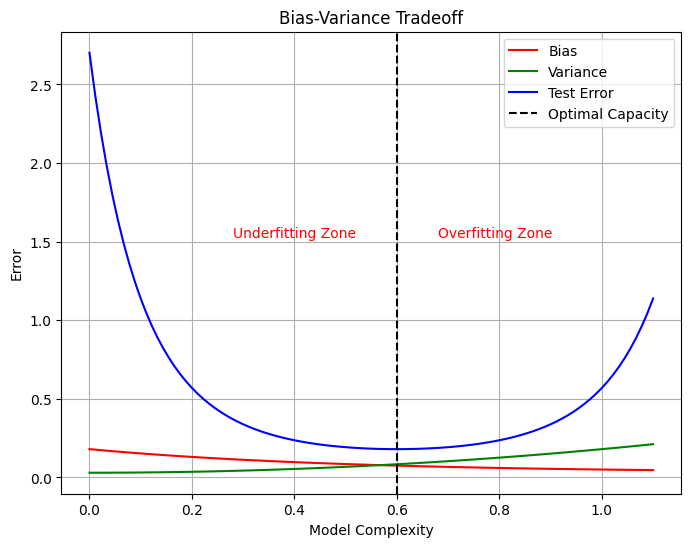

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0.0, 1.1, 100)
bias = 0.15 * np.exp(-2 * x) + 0.03    # Example bias curve
variance = 0.15 * x**2 + 0.03          # Example monotonically increasing variance curve
test_error = 0.15 * np.exp(8 * (x - 0.6)**2) + 0.03   # Example U-shaped test error curve

# Optimal capacity
optimal_capacity = 0.6

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, bias, label='Bias', color='red')
plt.plot(x, variance, label='Variance', color='green')
plt.plot(x, test_error, label='Test Error', color='blue')
plt.axvline(x=optimal_capacity, color='black', linestyle='dashed', label='Optimal Capacity')
plt.text(optimal_complexity - 4.7, np.min(test_error) + 1.35, 'Underfitting Zone', rotation=0, color='red')
plt.text(optimal_complexity -4.3, np.min(test_error) + 1.35, 'Overfitting Zone', rotation=0, color='red')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.show()


#### 3.3: Cross-Validation

In the absence of a very large designated test set that can be used to
directly estimate the test error rate, a number of techniques can be used
to estimate this quantity using the available training data. Here, we consider a class of methods that estimate the test error rate by $\textbf{holding out a subset of the training observations from the fitting process}$, and then applying the statistical learning method to those held out observations. This technique is called **Cross-Validation** (CV). CV is a useful method which can be used as an alternative to the usual training and test split as it allows us to more randomly separate the data and thus enables the model to better capture relationships between different instances of the data. There are generally three approaches to the CV process: Leave-One-Out CV, K-Fold CV and Time-Series CV.

##### 3.2.4.1: Leave-one-out CV

The LOOCV is closely related to the Validation Set approach, but it addresses some drawbacks of the former.

Like the validation set approach, LOOCV involves splitting the set of
observations into two parts. However, instead of creating two subsets of
comparable size, a single observation ($x_1$, $y_1$) is used for the validation set, and the remaining observations {($x_2$, $y_2$),...,($x_n$, $y_n$)} make up the training set.

The exact approach is as follows:

1. Fit the n-1 observations to obtain an estimate
2.  Predict y with the estimated coefficient
3. Calculate the MSE
4. Repeat the steps for each observation

The LOOCV estimate for the test MSE is the average of these n test error
estimates:
$$
\begin{equation}
    CV_{n} = \frac{1}{n}\sum^n MSE_i
\end{equation}
$$

There are some advantages relating to the validation set approach:

- LOOCV is less biased
  - We fit n-1 observations repeatedly instead of approx. 50 percent as in the validation approach
  - LOOCV approach tends not to overestimate the test error rate as much as the validation set approach does
- LOOCV will deliver the same results in each iteration
   - validation approach will yield different results when applied repeatedly due to randomness in the training/validation set splits
   - there is no randomness in the training/validation set splits for LOOCV


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1] TEST: [0]
TRAIN: [0] TEST: [1]


##### 3.2.4.2: K-Fold CV

An alternative to LOOCV is k-fold CV. The exact approach is as follows:

1. Randomly divide the set of observation into k folds (groups) of approximately equal size
2. First fold treated as validation set, the rest is training
3. MSE1 is then computed in the validation fold
4. Repeated k times
5. Obtain k estimates of the test error, MSE1, MSE2,..., MSEk

The k-fold CV estimate is computed by averaging these values:

$$
\begin{equation}
    CV_k = \frac{1}{k}\sum^k MSE_i
\end{equation}
$$

The LOOCV is a special form of the K-Fold CV in which K is enhanced to N. Also, as opposed to the Valdation Set approach, it does not choose a different randomization in each step, but rather chooses randomization at the beginning and then sticks with the generated splits.

The main advantage of this strategy is that it is less computationally expensive than the LOOCV.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


##### 3.2.4.3: Bias and Variance Trade-Off

A less obvious but potentially more important advantage of k-fold CV is that it often gives more accurate estimates of the test error rate than does LOOCV.

Remember we said that the Validation Set approach tends to overestimate the generalisation error since we only use approximately half of our available data for training. On the other hand, LOOCV will give an approximately unbiased estimate of the generalisation error since we use n-1 observations to train the model on and can therefore predict the actual relationship quite well.

Since K-Fold has fewer training observations that LOOCV, it will therefore suffer from a **higher bias in the generalisation error**.

However, it turns out that LOOCV has **higher variance than does k-fold CV**. This is because in LOOCV, we use training samples that are highly correlated with each other, whereas the correlation coefficient is lower for K-Fold CV as the overlap is smaller. Since the variance of a mean with many correlated variables is higher, the test error has a higher variance in the LOOCV case.

To summarize:

1. There is a bias-variance trade-off associated with the choice of k in k-fold cross-validation
2. Typically, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance

##### 3.2.4.4.: Stratified k-fold CV

Sometimes our dataset may have a pronounced imbalance between the different classes of our target values. For instance, house prices may be biased towards high prices or even in easier examples, there may just be more images of cats than of dogs. Stratified k-fold CV is a variation of the k-fold CV enountered earlier which is specifically designed to address this issue.

Stratified k-fold CV is a technique used to evaluate the performance of a machine learning model while ensuring that the distribution of the target variable (or class labels in the case of classification) remains consistent across different folds of the data. In classification problems, it splits the data into k folds under the condition that each fold contains approximately an equal percentage of samples of each target class. In regression problems, it ensures that the mean target value is approximately equal throughout all folds.

The exact approach is as follows:

1. Randomly divide the set of observation into k folds (groups) of approximately equal percentage of samples for each target class
2. First fold treated as validation set, the rest is training
3. MSE1 is then computed in the validation fold. Repeated k times
4. Obtain k estimates of the test error, MSE1, MSE2,..., MSEk






In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


##### 3.2.4.5: Time-series CV

One main issue with CV approaches is that they assume the underlying data to be IID. This is clearly not the case for many applications where we experience strong correlations both in the time-series as well as in the cross-section. One field in which this issue is especially pronounced is the stock market. In order to predict the price of an asset at a future date, we need to incorporate serial correlation features into our validation approach. For instance, in time series, we cannot just randomly sample the data into training and test observations because we would automatically use future events to predict past events. As such, we need to avoid future-looking when training the model. Most importantly, we need to preserve the temporal dependency between observations.

###### 3.2.4.5.1: Blocking Time Series Split

The baseline option of time-series CV is to perform multiple, iteratively added splits throughout the time series. That is, we first take observation 1-t as training set and then observation t+1 as validation set. We then proceed one day and start from 2-t+1 as training and take t+2 as validation set. This is a simple time series split. The issue with this split is that we introduce leakage from future data to the model. The model will observe future patterns to forecast and try to memorize them.

In order to circumvent this issue, we are going to use a `Blocking Time Series split`. This split adds two margins at two positions:

1. Between the training and validation folds for one CV iteration
  - To prevent the model from taking lag values which are taken twice (as predictor and output)
2. Between the folds used at each CV iteration
 - To prevent the model from memorizing patterns throughout iterations

 If we look at the exact feature of this, we want our CV approach to look like the following plot:

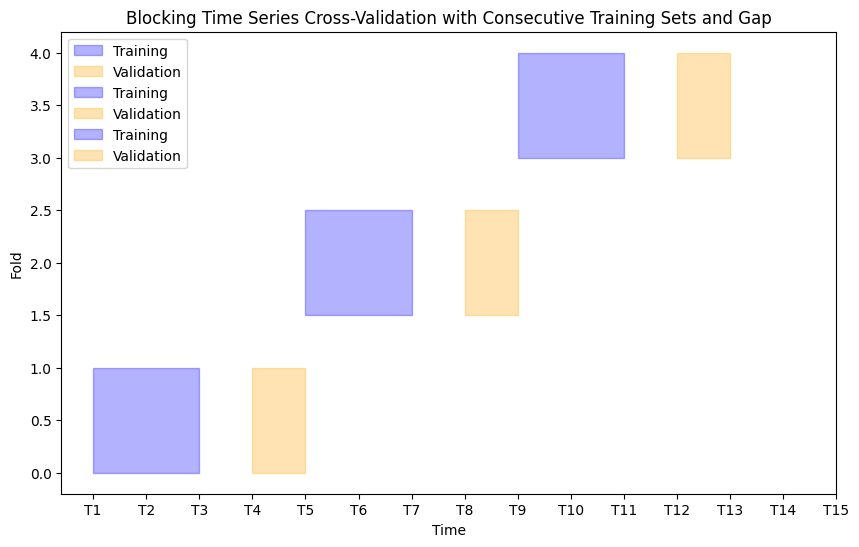

In [ ]:
import matplotlib.pyplot as plt

# Time series data points
timestamps = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15']

# Rolling window CV with consecutive training sets
training_windows = [('T1', 'T3'), ('T5', 'T7'), ('T9', 'T11')]
validation_windows = [('T4', 'T5'), ('T8', 'T9'), ('T12', 'T13')]

# Gap between each fold
gap = 0.5

# Create the plot
plt.figure(figsize=(10, 6))
for i, (train_window, val_window) in enumerate(zip(training_windows, validation_windows)):
    plt.fill_between([timestamps.index(train_window[0]), timestamps.index(train_window[1])],
                     i + i * gap, i + 1 + i * gap, color='blue', alpha=0.3, label='Training')
    plt.fill_between([timestamps.index(val_window[0]), timestamps.index(val_window[1])],
                     i + i * gap, i + 1 + i * gap, color='orange', alpha=0.3, label='Validation')

plt.xticks(range(len(timestamps)), timestamps)
plt.xlabel('Time')
plt.ylabel('Fold')
plt.title('Blocking Time Series Cross-Validation with Consecutive Training Sets and Gap')
plt.legend(loc='upper left')
plt.show()


Here, we can see the two margins, or gaps. The first is between the training and validation set for the respective fold. The second is for the gap between the training and validation observation between the CV folds.

###### 3.2.4.5.2: A function for sequential and blocking time series splits

Unfortunately, sklearn only provides a function to account for the rolling CV aspect of the time-series data. That is, we only have the gap betwee the training and validation sets within a CV fold, but there is no gap between the training and validation set data throughout the CV folds. As such, we can create a simple class which customises the options

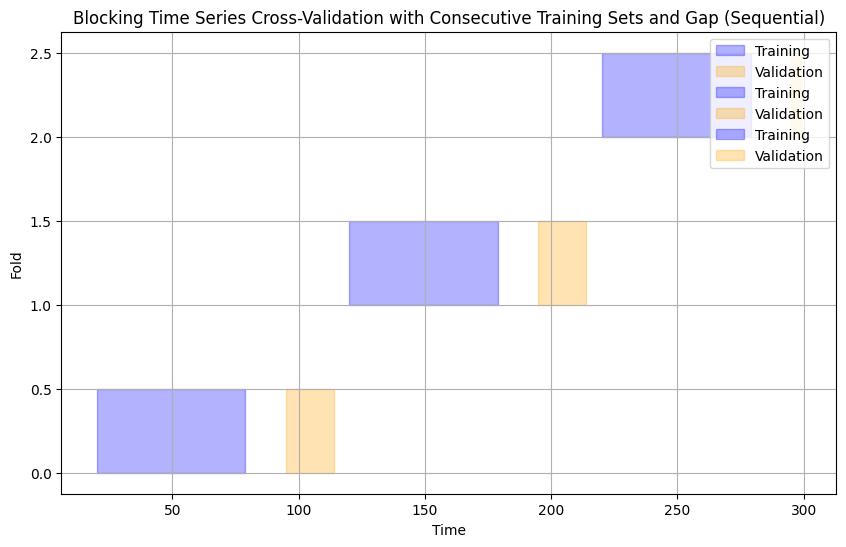

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

class CustomKFold:
    """
    CustomKFold class for generating custom cross-validation splits on time series data.

    Parameters
    ----------
    n_splits : int, default=3
        Number of splits (folds) in the cross-validation.

    gap : int, default=0
        Number of samples to exclude from the end of each training set before the validation set.

    test_size : int, default=None
        Size of the validation set for each split. If None, the validation set size is determined
        based on the number of samples and the number of splits.

    gap_cv : int, default=0
        Number of samples to skip between the last observation of the previous fold and the
        first observation of the subsequent fold. Importantly, negative numbers
        increase the space between the CV folds.

    sequential : bool, default=True
        If True, uses sequential cross-validation similar to sklearn's TimeSeriesSplit.
        If False, uses custom cross-validation logic with specified gaps and test sizes.

    Attributes
    ----------
    n_splits : int
        The number of splits (folds) in the cross-validation.

    gap : int
        The number of samples excluded from the end of each training set before the validation set.

    test_size : int or None
        The size of the validation set for each split.

    gap_cv : int
        The number of samples skipped between the last observation of the previous fold and the
        first observation of the subsequent fold. Importantly, negative numbers
        increase the space between the CV folds.

    sequential : bool
        Indicates whether the cross-validation behavior is sequential or custom.

    Methods
    -------
    split(X, y=None, groups=None)
        Generate indices to split data into training and validation sets for each fold.

    Examples
    --------
    np.random.seed(42)
    time_series_length = 300
    returns = np.random.normal(0.001, 0.02, time_series_length)
    price_series = np.cumprod(1 + returns)
    custom_kfold = CustomKFold(n_splits=3, gap=20, test_size=20, gap_cv=-5, sequential=True)
    for train_indices, val_indices in custom_kfold.split(data)
    """
    def __init__(self, n_splits=3, gap=0, test_size=None, gap_cv=0, sequential=True):
        self.n_splits = n_splits
        self.gap = gap
        self.test_size = test_size
        self.gap_cv = gap_cv
        self.sequential = sequential

    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        if self.sequential:
            tscv = TimeSeriesSplit(n_splits=self.n_splits, test_size=self.test_size, gap=self.gap)
            for train_indices, val_indices in tscv.split(X):
                yield train_indices, val_indices
        else:
            for i in range(self.n_splits):
                start = i * k_fold_size
                stop = start + k_fold_size
                mid = int(0.8 * (stop - start)) + start
                gap = self.gap
                gap_cv = self.gap_cv
                test_size = self.test_size

                if test_size is None:
                    test_size = n_samples // (self.n_splits + 1)

                yield (
                    indices[start + gap: mid],
                    indices[mid + gap + gap_cv: mid + gap + gap_cv + test_size],
                )

# Initialize CustomKFold class
custom_kfold = CustomKFold(n_splits=3, gap=20, test_size=20, gap_cv=-5, sequential=False)

# Generate a financial time series with random fluctuations
np.random.seed(42)
time_series_length = 300
returns = np.random.normal(0.001, 0.02, time_series_length)
price_series = np.cumprod(1 + returns)

# Initialize CustomKFold with 3 splits
custom_kfold = CustomKFold(n_splits=3, gap=20, test_size=20, gap_cv=-5, sequential=False)

# Create the plot
plt.figure(figsize=(10, 6))
for fold, (train_indices, val_indices) in enumerate(custom_kfold.split(price_series)):
    plt.fill_between(train_indices, fold, 0.5 + fold, color='blue', alpha=0.3, label='Training')
    plt.fill_between(val_indices, fold, 0.5 + fold, color='orange', alpha=0.3, label='Validation')

plt.xlabel('Time')
plt.ylabel('Fold')
plt.title('Blocking Time Series Cross-Validation with Consecutive Training Sets and Gap (Sequential)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#### 3.4: Gradient Descent

The training of a neural net can be represented through an **optimisation process** which at its core aims at the **minimisation of a loss function**, such as the negative log-likelihood defined earlier. In order to do so, we need to define an optimal set of weights for our model which minimises this loss function. However, for DNN loss functions, an analytical approach is unpractical or even unfeasible because the dimensions of the parameter space are large and the analytical expressions for the loss functions are quite complex.

In order to minimise functions with a large parameter space and complex analytical expressions, the usual solution is to use a numerical approach which is called `Gradient Descent` (=GD).  

```
The main idea of GD methods lays in the fact that any multivariate function decreases fastest in the direction of the negative gradient of the function.
```

Heuristically speaking, the analogy follows most closely the decision of a hiker to descend a mountain through a forest. As she is unable to see the valley through the trees, one option for her is to simply take each step with the largest descent that she can see, without being able to take into consideration the future steps to reach the valley. Therein, the valley is equivalent to the global minimum which cannot be observed from her local standpoint (so locally).




##### 3.4.1: Deterministic GD methods

The deterministic GD method is the iterative process where we update the parameters at each step along the direction of the gradient of
the loss function. As such, by moving along the gradient, we can most quickly reach a potential global minima.

Let's visualise the GD method with a simple convex function:

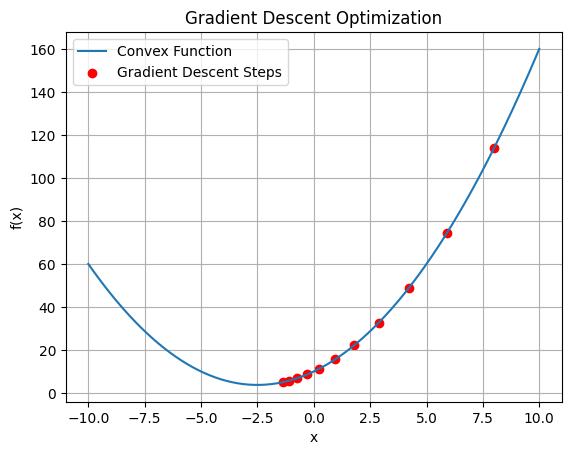

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a convex function
def convex_function(x):
    return x**2 + 5*x + 10

# Define its derivative (gradient)
def gradient(x):
    return 2*x + 5

# Gradient Descent parameters
learning_rate = 0.1
initial_x = 8
num_iterations = 10

# Initialize lists to store values during optimization
x_values = [initial_x]
y_values = [convex_function(initial_x)]

# Gradient Descent optimization loop
for _ in range(num_iterations):
    current_x = x_values[-1]
    new_x = current_x - learning_rate * gradient(current_x)
    x_values.append(new_x)
    y_values.append(convex_function(new_x))

# Create the plot
x_vals = np.linspace(-10, 10, 400)
y_vals = convex_function(x_vals)
plt.plot(x_vals, y_vals, label='Convex Function')
plt.scatter(x_values, y_values, color='red', label='Gradient Descent Steps')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()


As we can see, the main idea of GD is the following:

1. From a random initial point in the parameter space, move to the next point by choosing the appropriate direction of the gradient
2. Continue iteratively until the desired precision in minimization is achieved

In mathematical terms, this implies to start at a random point and then update the weights according to the following rule:

$$
w_{x+1} = w_x - \eta\triangledown_w f(w)
$$

As you can see, the update process involves two parameters:

1. Gradient Vector:
  - the first derivative of the loss function with respect to the coefficient w
  -  indicates the steepest change of a function with respect to its underlying factors

2. Step Size ($\eta$)
  -  defines with what magnitude the gradient descends and how quickly the coefficient approaches the appropriate value

Remember that the gradient is the steepest change of a function. Therefore, by subtracting the gradient from a coefficient, we get the **steepest possible decline of that functional value to the next coefficient point** (aka the fastest possible decline) of the function.


###### 3.4.1.1: The appropriate step size

As we can see both visually and mathematically, the choice of the step size has important implications on the model's ability to converge to a global minima. If the learning rate is too small, we may take too many iterations to approach the minima. However, if it is too large, we may jump around the local minima. As such, there are important implications to take into account when choosing the step size:

1. Choice of the learning rate:

  - Constant: $\eta = c$
  - Decaying: $\eta = \frac{c}{t}$

2. Backtracking line search
  -  Start with c/t
  - Check if decrease successful:
    - If $f(w_{x} - \eta_x\triangledown_w f(w) < f(w)$: Leave c/t
    - If not: Multiply c/t by a decaying factor
  - Repeat until condition is met


##### 3.4.2: Convexity

One of the key questions of GD is whether the sequence converges to a minimal value $L(\tilde a)$. In order to be able to guarantee convergence, we need to introduce the notion of `convexity`. Convexity refers to a property of a mathematical function where any line segment connecting two points on the graph of the function lies above or on the graph itself.

-------------
** Definition 7: Convexity**

Let $\mathbb K$ be a set. $\mathbb K$ is set to be convex if there exists an x, y $\in \mathbb K$ such that for any $\lambda \in [0,1], \lambda x + (1-\lambda)y \in \mathbb K$

-------------------



Mathematically, a function f is convex if:

$$
f(\lambda x + (1 - \lambda)y) \leq \lambda f(x) + (1 - \lambda) f(y)
$$

This means that a convex set is one where for any two points in a set, every point between them is also in the set. This can be visualised below:

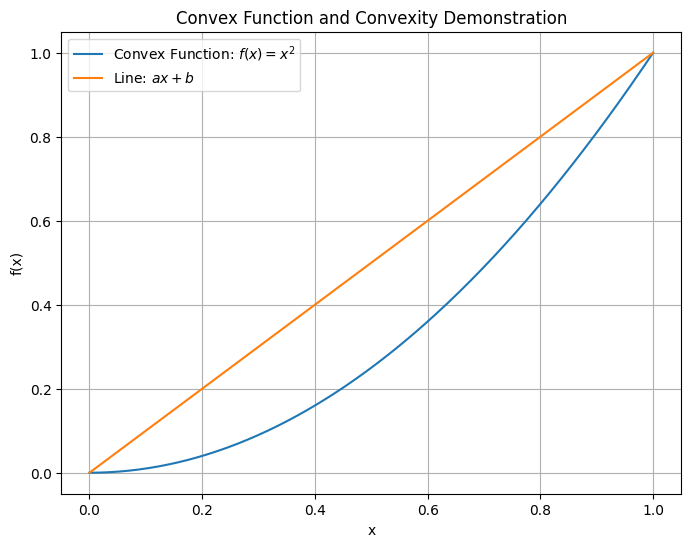

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the convex function
def convex_function(x):
    return x ** 2

# Define the line connecting two points on the graph
def line_segment(x, a, b):
    return a * x + b

# Define the interval for x values
x_values = np.linspace(0, 1, 400)

# Calculate function values
y_values = convex_function(x_values)

# Calculate line values for convexity demonstration
a = (convex_function(1) - convex_function(0)) / (1 - 0)  # Slope
b = convex_function(0) - a * 0  # y-intercept
line_values = line_segment(x_values, a, b)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Convex Function: $f(x) = x^2$')
plt.plot(x_values, line_values, label='Line: $ax + b$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convex Function and Convexity Demonstration')
plt.legend()
plt.grid()
plt.show()


as we can see, the orange line is defined as $\lambda f(x) + (1 - \lambda) f(y)$ while the blue line is defined as $f(\lambda x + (1 - \lambda)y)$.

Convexity is an important condition for GD methods because of the following two properties:

**Property 1: Local vs global minima**

- Any local minimum of a convex function L is also a global minimum

**Property 2: Convergence of GD**:

Suppose the function $\mathbb L: \mathbb R^\mu \rightarrow \mathbb R$ has the following properties:

- L is convex and differentiable
- L admits a global minimum at $\tilde(a)$
- $\triangledown L$ is a Lipscchitz with constant d
  - That is, we have: $||\triangledown L(a_1) - \triangledown L(a_2)|| \leq d||a_1 - a_2||$ (where ||$\cdot$|| is the euclidian norm)

Then:

$$
L(a^k) - L(\tilde a) \leq \frac{||a^0 - \tilde a||^2}{2\eta k}
$$

if $\eta \leq 1/d$, then the **GD is guaranteed to converge if the learning rate is small enough**.



##### 3.4.3: Hessian Matrix

The Hessian matrix is an important concept when understanding global minima and maxima. The Hessian matrix provides information about the curvature of a function at a given point. The diagonal elements represent the second partial derivatives of the function with respect to each variable, which indicate the curvature along that variable's axis. The off-diagonal elements represent the mixed partial derivatives, indicating how the curvature changes as you move in multiple directions simultaneously.

$$
H_f =
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
    \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$


**Local Minima, Maxima, and Saddle Points**

In order to define local extrema, we may look at the Eigenvalues of the Hessian. Eigenvalues provide crucial information about the curvature of a function at a given point.

In the context of a matrix A, an eigenvalue $\lambda$ is a scalar such that when A is multiplied by a corresponding eigenvector $v$ the result is a scaled version of $v$:

$$
\lambda A = \lambda v
$$

Eigenvalues and eigenvectors help us understand how the linear transformation represented by the matrix stretches, compresses, or rotates vectors. In the case of the Hessian matrix, the eigenvalues provide insights into the curvature of a function at a specific point:

- A local minimum occurs at a point if the Hessian matrix is positive definite (all its eigenvalues are positive)
- A local maximum occurs at a point if the Hessian matrix is negative definite (all its eigenvalues are negative)
- A saddle point occurs at a point if the Hessian matrix has both positive and negative eigenvalues

Let's provide an example:

In [ ]:
import numpy as np
from scipy.linalg import hessenberg, schur

# Define the Hessian matrix
hessian_matrix = np.array([[6, 2, 2, 2],
                           [2, 8, 4, 4],
                           [2, 4, 10, 5],
                           [2, 4, 5, 12]])

# Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(hessian_matrix)

# Check if the matrix has an extrema
if all(eig > 0 for eig in eigenvalues):
    extremum_type = "Local Minimum"
elif all(eig < 0 for eig in eigenvalues):
    extremum_type = "Local Maximum"
else:
    extremum_type = "Saddle Point"

print("Hessian Matrix:")
print(hessian_matrix)
print("\nEigenvalues:", eigenvalues)
print("\nMatrix has an:", extremum_type)


Hessian Matrix:
[[ 6  2  2  2]
 [ 2  8  4  4]
 [ 2  4 10  5]
 [ 2  4  5 12]]

Eigenvalues: [19.83662802  6.28448764  4.60987731  5.26900704]

Matrix has an: Local Minimum


If we ensure positive eigenvalues in our hessian, we fulfil the first prerequisite of optimization, which is that the a function can be minimized for a certain coefficient.

##### 3.4.4: Stochastic GD methods

Stochastic GD methods are essentially similar to Deterministic GD methods with one notable exception: The **amount of data used to update the weights at an iteration**. This is also called batch size. When using Stochastic GD, we simply take a batch of other datapoint pairs and calculate the respective loss based on the difference of only the batch estimated and observed values.

There are two forms of SGD methods:

**Pure SGD**:

Pure SGD has a batch size of 1, meaning each training example is treated as a separate batch, is known as pure SGD. This approach introduces a lot of noise into the parameter updates, which can help the algorithm escape local minima but might slow down convergence.

**Mini Batch SGD**:

Mini-Batch SGD involves selecting a small batch of data (e.g., 32, 64, 128 samples) for each parameter update. Mini-batch SGD combines some of the benefits of pure SGD (escape local minima) with the efficiency of full-batch gradient descent.




###### 3.4.4.1: Batch Size

Batch size refers to the number of training examples used in each iteration of the gradient descent algorithm. In other words, it determines how many data points are processed before a parameter update is performed.

The main idea of SGD is to choose a random sample of objects from the training set T called a batch to calculate the gradient at each iteration step instead of using the entire training set.

Mathematically speaking, what we do is the following:

$$
w_{x+1} = w_x - \eta\triangledown_w \frac{1}{|T_n|} \sum_{s\in T_n} f(w)
$$

where $T_n \subset T$ is the batch used at the nth iteration. Usually, the number of objects in each batch is fixed over all iterations, and this number is called the `batch size`.

The batch size is a hyperparameter that you can tune based on your available memory, computational resources, and the characteristics of your dataset.

###### 3.4.4.2: Epochs

An epoch is a single pass through the entire training dataset during the optimization process. In other words, one epoch consists of processing all the available training examples once. More precisely, an epoch is a family of iterations of the following size:

$$
\text{number of iterations in epoch} = \frac{size of training set}{batch size} = \frac{|T|}{|T_n|}
$$

After each epoch, the model's parameters are updated based on the accumulated gradients from all the batches within that epoch.

During each epoch, the data is typically divided into mini-batches, and the model's parameters are updated multiple times within each epoch. The number of updates within an epoch depends on the batch size.

Increasing the number of epochs allows the model to see the entire dataset multiple times and refine its parameters based on the overall trends in the data. However, training for too many epochs can lead to overfitting, where the model memorizes the training data rather than generalizing to new data.

###### 3.4.4.3 Epochs and Batch Sizes


Combining batch size and epochs allows you to control how the optimization process unfolds. Larger batch sizes can lead to more accurate gradient estimates but might slow down training due to fewer parameter updates per epoch. Smaller batch sizes introduce more noise but can result in faster convergence. The choice of batch size and the number of epochs depends on the characteristics of your data, the complexity of your model, and the resources available for training.

#### 3.5: Backpropagation

Backpropagation (also known as backpropagation of the errors) defines the entire framework to adjust a neural network's parameters such that the value of a chosen loss function can be minimised. It is the main concept such that an ML model improves its approximation and generalisation abilities through an iterative learning process.

It's the main method for updating the model's parameters (in our case: weights and biases) to minimize the difference between predicted and actual output values.






##### 3.5.1: The main concept

Backpropagation can be distributed into the following steps:


**1. Forward Pass**:

During the forward pass, input data is fed through the neural network layer by layer. Each layer applies a set of weights to the input data, adds biases, and applies an activation function. The final layer produces the predicted output.

This relates to *Chapter 2.3* where we discussed the concept of fully-connected feed-forward networks.

**2. Loss Calculation**:

The predicted output is compared to the actual target values using a loss function. The loss function quantifies the difference between the predicted and actual values.

This relates to *Chapter 3.1 & 3.2* where we discussed the concept of loss functions and data splitting.

**3. Backward Pass (Gradient Calculation)**:

In the backward pass, the gradient of the loss function with respect to the model's parameters is computed. This involves calculating the derivative of the loss function with respect to each parameter in the network. The gradient indicates how much the loss would change for a small change in each parameter and helps us to iteratively approach a minima of the respective loss function.

This relates to *Chapter 3.4* where we discussed the concept of gradient descent.

**4. Parameter Updates**:

The computed gradients are used to update the model's parameters using an optimization algorithm. Given the GD methods, the parameters are then adjusted (updated) in the opposite direction of the gradient to minimize the loss.

**5. Iteration**:

Steps 1 to 4 are repeated throughout sample sizes (batches) for a number of iterations (epochs) until the model's performance converges to a satisfactory level or a stopping criterion is met.


##### 3.5.2: Computational Complexity

Before we can look at the additional steps and concepts of backpropagation, it first is necessary to dive a little into the concept of computational complexity.

When it comes to computational complexity we are typically concerned about how
the algorithms behave for a large number of operations. Since this depends on many parameters, we often wish to focus on the order of magnitude without considering precise numerical constants. The following definition provides a rigorous mathematical meaning to this idea.

--------------------
**Definition 9: The Landau Symbol**:

Consider two functions f,g $\in \mathbb N \rightarrow R$. If there exist a constanc C > 0 and an integer N such that

$$
|f(n) \leq C|g(n)|
$$

for all n > N, then f is said to be of at most order g as $n \rightarrow \inf$. We denote this by:

$$
f(n) = O(g(n))  \text{ if } n \rightarrow \inf
$$

We can also define the Landau Equation as a limit term.

**Definition 10: Landau as Limit**:

Let f,g $\in \mathbb N \rightarrow R$. If $\lim_{n \rightarrow \inf} f(n)/g(n)$ exists and is finite, then $f(n) = O(g(n))$ as $ n \rightarrow \inf$.

Especially the second specification is usually used to determine the order of magnitude of a the computational operations.

-------------------

The $O(\cdot)$ symbol is called `Landau` Symbol.

As such, $O(\cdot)$ describes the upper bound or asymptotic behavior of a function in terms of another function. It characterizes how the growth of one function compares to the growth of another function as their inputs approach infinity.

In other words, f(n)=O(g(n)) means that f(n) grows at most as fast as a constant multiple of g(n) for sufficiently large values of x. As such, they are asymptotically bounded towards a given order of magnitue, which can be used to define the computational complexity of an operation. Normally, f(n) gives the number of operations that is sufficient to complete the computation. If and g(n) is such that f (n) = O(g(n)), we can also say that the order of complexity of the computation is O(g(n)).

Usually, in computer science the following common orders are worth to be highlighted:

$$
O(1) \leq O(\log n) \leq O(n^s) \leq O(\exp n)
$$

One usually defines

- $O(1)$ as bounded in n as $n \rightarrow \inf$
- $O(\log n)$ as logarithmically bounded
- $O(n^s)$ as polynomial growth
- $O(\exp n)$ as exponential growth






###### 3.5.2.1: The number of operations of a neural network algorithm

Generally, we try to choose g as simple as possible, ignoring constant factors and smaller-order terms.

Whenever possible we also try to ensure that $g(n) = O(f(n))$.

Essentially, this means that we want to ensure that the algorithm used is **asymptotically bounded upwards to the maximum number of operations sufficient to complete a computation**.

As a consequence, the **order of the algorithm** used should **not** be higher than the **sum of all operations** required to perform it.

In order to understand this better, let's define an operation. An operation is any of the following:

- addition
- subtraction
- multiplication
- division
- exponentation
- comparison of values

Let's provide you with an example of this by looking at the matrix multiplication. Let $A = (a_{i,j})$ and $B = (b_{i,j})$ be two n x n matrices. Their componentwise product is given by:

$$
(AB)_{i,j} = \sum_{k=1}^n a_{i,k}b_{k,j}
$$

where $i, j \in {1, \dots, n}$.

Let's break down this operation into two steps:

1. Dot-Products Calculation
  - We performn n multiplications
      - ($a_{1,1} * b_{1,1}, \dots, a_{1,n} * b_{n,1})$
  - We perform n-1 additions
      - ($a_{1,1} * b_{1,1}, + \dots + a_{1,n} * b_{n,1}$)
2. Componentwise repetition
  - We repeat these two operations for each row of the first and each column of the second matrix
  - Each matrix has n x n dimensions
  - Consequently, we repeat it $n \times n$ times

The overall computational cost for this operation is therefore:

$$
n * (n + n-1) * n = n^2(2n-1)
$$

Where:
- n is the number of operations for the multiplication
- (n-1) is the number of operations for the summation of the products
- $n^2$ is the number of operations for the repetition of the dotproduct calculations throughout n columns and n rows

As to Definintion 10, we know that $f(n) = O(g(n))$ as $ n \rightarrow \inf$ if $\lim_{n \rightarrow \inf} f(n)/g(n)$ exists and is finite.

Consequently, we can take the second formulation and compare it with the order of magnitude:

$$
\lim_{n \rightarrow \inf} \frac{n^2(2n-1)}{n^3} = 2
$$

Recall that we derived $n^3$ as $n^2*2n$, hence the largest component of f(n).

Given that, we understand that the complexity of the multiplication of an $n \times n$ matrix is $O(n^3)$.



Let's provide you with a python-based example below. Therein, we quickly show you how to perform matrix multiplication in a step-by-step (non-vectorised) manner.

In [ ]:
import numpy as np

# Define the matrices A and B
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

# Initialize the result matrix C with zeros
C = np.zeros((3, 3))

# Perform matrix multiplication
for i in range(3):
    for j in range(3):
        for k in range(3):
            C[i][j] += A[i][k] * B[k][j]

# Print the matrices and the result
print("Matrix A:")
print(A)
print("Matrix B:")
print(B)
print("Result matrix C:")
print(C)


Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix B:
[[9 8 7]
 [6 5 4]
 [3 2 1]]
Result matrix C:
[[ 30.  24.  18.]
 [ 84.  69.  54.]
 [138. 114.  90.]]


##### 3.5.3: The Chain Rule

The chain rule is a fundamental rule in calculus that allows us to compute the derivative of a composite function. In the context of neural networks and backpropagation, the chain rule is used to calculate gradients through each layer of the network during the backward pass. The chain rule states that the derivative of a composition of functions is the product of the derivatives of the individual functions.

Mathematically, if we have two functions f(x) and g(y), where y=g(x), then the chain rule is given by:

$$
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}
$$

We can generalize the chain rule beyond the univariate case. Consider the case where $w \in \mathbb R^m$ and $h \in \mathbb R^n$, which means that the inner function, f, maps m inputs to n outputs, while the outer function, g, receives n inputs to produce an output, h. For i = 1, …, m  the generalized chain rule for a two-state function (two functions chained) states:

$$
\frac{\delta h}{\delta x_i} = \frac{\delta h}{\delta u_1} \cdot \frac{\delta u_1}{\delta x_i} + \frac{\delta h}{\delta u_2} \cdot \frac{\delta u_2}{\delta x_i} + \dots + \frac{\delta h}{\delta u_n} \cdot \frac{\delta u_n}{\delta x_i} = \sum_j \frac{\delta h}{\delta u_j} \cdot \frac{\delta u_j}{\delta x_i}
$$

We can also visualise this as a tree diagram:


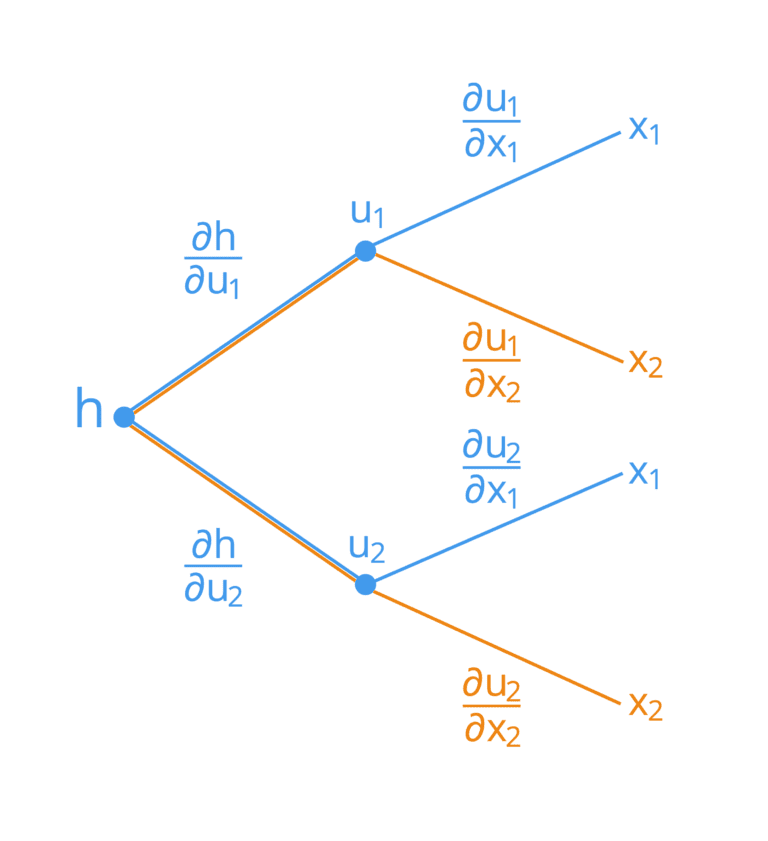

###### 3.5.3.1: Backpropagation and the Chain Rule

Backpropagation calculates the gradients using the chain rule of calculus.

Remember that each ANN is an iterative combination of non-linearily transformed, affine functions. Essentially, we do nothing more than:

- Transform the inputs x as $w\cdot x + \beta$
- Transform the affine function non-linearly ($\lambda(w\cdot x + \beta)$)
- Repeat the process until we use a soft activation function to determine the probabilities of the outputs and choose a predicted value

As such, all transformations we compute are dependent on each other. The input of one layer is the output of another layer. Consequently, when calculating the gradient in the backpropagation process, we understand that it depends on the gradients of the previous layer. As such, each function is "chained" into the previous functions, creating one large chain of individual affine and non-linearily transformed functions.

The chain rule allows us to break down the computation of gradients through each layer in terms of the gradients of the previous layers. This process continues backward through the network until we reach the input layer. The calculated gradients are then used to update the model's parameters during the optimization process.


###### 3.5.3.2: Jacobians and the Chain Rule


The Jacobian matrix is a matrix of partial derivatives that describes how the components of a vector-valued function change with respect to each input variable. It generalizes the concept of the derivative of a scalar function to vector-valued functions. It is defined as follows:

--------------

**Definition 11: Jacobian Matrix**

The Jacobian matrix J of a vector-valued function $\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is defined as:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

Where:
- $\frac{\partial f_i}{\partial x_j}$ represents the partial derivative of the i-th component of $\mathbf{f}$ with respect to the  j-th input variable $x_j$
------------------------------------


The Jacobian matrix and the chain rule are closely connected when dealing with multivariable functions. The Jacobian matrix represents the collection of partial derivatives of a vector-valued function with respect to its input variables, while the chain rule provides a method to compute the derivative of a composite function. The connection becomes evident when considering the composition of functions and their derivatives.

Mathematically, the connection between the Jacobian matrix and the chain rule can be expressed as follows:

Given a composition of functions $f: \mathbb{R}^m \to \mathbb{R}^n$ and $g: \mathbb{R}^n \to \mathbb{R}^p$, the chain rule states that the derivative of the composition $h = g \circ f$ is given by:

$$
J_h(x) = J_g(f(x)) \cdot J_f(x)
$$

Where:
- $J_h(x)$ is the Jacobian matrix of h at point x
- $J_g(f(x))$ is the Jacobian matrix of g evaluated at f(x)
- $J_f(x)$ is the Jacobian matrix of f evaluated at x

To illustrate, let's consider the derivative of $ h = f \cdot g$, another composition of functions. Applying the chain rule to h, we have:

$$
\frac{{dh}}{{dx}} = \frac{{dh}}{{dg}} \cdot \frac{{dg}}{{df}} \cdot \frac{{df}}{{dx}}
$$

In terms of the Jacobian matrices, this becomes:
$$
J_h(x) = J_g(f(x)) \cdot J_f(x)
$$



As a consequence, we understand that we can compute thee chain rule as **matrix multiplication of the Jacobians of the different chained functions**.

As a consequence, we understand that Chain Rule = Matrix Multiplication. Since the chain rule is a building block of the backpropagation algorithm, the computational complexity of such multiplication for large n plays an important role in the evaluation of the complexity of backpropagation. That's why it was important for us to determine the computational complexity of the matrix multiplication operations first.

Let's provide you with an example to illustrate the case of the chain rule as matrix multiplication of the jacobians of the chained functions more clearly.

----

We are given the following two functions.

$$
f(u,v) = \begin{pmatrix} u^2 + 3uv \\ e^{u+v} \end{pmatrix}, \quad
g(x,y) = \begin{pmatrix} xy \\ x^2 + y^2 \end{pmatrix}
$$

The functions can be connected through a chain rule as: $f(g(x,y,))$. As such, we can compute the Jacobians of both functions and multiply their matrices in order to obtain the desured derivative of the chain rule.

Jacobian matrix for f(u,v) at u,v = 1,0:

$$
\text{Jacobian}_{f(u,v)}(1,0) = \begin{pmatrix} 2u + 3v & 3u \\ e^{u+v} & e^{u+v} \end{pmatrix} \Bigg|_{u=1, v=0}
$$

Jacobian matrix for g(x,y) at x,y = 1,0:

$$
\text{Jacobian}_{g(x,y)}(1,0) = \begin{pmatrix} y & x \\ 2x & 2y \end{pmatrix} \Bigg|_{x=1, y=0}
$$

Matrix multiplication of Jacobian matrices:

$$
\text{Resulting Jacobian Matrix (} f(g(x)) \text{)} = \text{Jacobian}_{f(u,v)}(1,0) \cdot \text{Jacobian}_{g(x,y)}(1,0)
$$

----------

Let's calculate this in the code below:

In [ ]:
import numpy as np

def f(u, v):
    return np.array([u**2 + 3*u*v, np.exp(u + v)])

def g(x, y):
    return np.array([x*y, x**2 + y**2])

# Calculate the Jacobian matrix for f(u,v)
def jacobian_f(u, v):
    df_du = np.array([2*u + 3*v, np.exp(u + v)])
    df_dv = np.array([3*u, np.exp(u + v)])
    return np.column_stack((df_du, df_dv))

# Calculate the Jacobian matrix for g(x,y)
def jacobian_g(x, y):
    dg_dx = np.array([y, 2*x])
    dg_dy = np.array([x, 2*y])
    return np.column_stack((dg_dx, dg_dy))

# Calculate the Jacobians at specific points
u, v = 1, 0
x, y = 1, 0

jacobian_f_uv = jacobian_f(u, v)
jacobian_g_xy = jacobian_g(x, y)

# Multiply the Jacobian matrices
jacobian_chain = np.dot(jacobian_f_uv, jacobian_g_xy)

print("Jacobian Matrix for f(u,v) at u,v = 1,0:")
print(jacobian_f_uv)

print("\nJacobian Matrix for g(x,y) at x,y = 1,0:")
print(jacobian_g_xy)

print("\nResulting Jacobian Matrix (f(g(x))) after matrix multiplication:")
print(jacobian_chain)


Jacobian Matrix for f(u,v) at u,v = 1,0:
[[2.         3.        ]
 [2.71828183 2.71828183]]

Jacobian Matrix for g(x,y) at x,y = 1,0:
[[0 1]
 [2 0]]

Resulting Jacobian Matrix (f(g(x))) after matrix multiplication:
[[6.         2.        ]
 [5.43656366 2.71828183]]


###### 3.5.3.3: Mathematical Calculation of Backpropagation for a Simple Neural Network

We now covered the entire backpropagation process. The backpropagation can be defined as an iterative process of calculating the partial derivatives of the individual affine and non-linearly transformed functions, which can be executed through application of the chain rule. The chain rule therein can be expressed as Jacobians, whereas we multiply the Jacobian matrices of the individual functions for which we take the partial derivatives. These matrix multiplications then ultimately result in the derivatives of the functions, which define the gradient with which we will update the weights. This matrix multiplication has as sum (or number) of operations $n^2(2n-1)$ and is thus shown to be of order $O(n^3)$ for two n x n matrices, which is a polynomial and thus computationally complex operation.

We will now put our theoretical knowledge into practice by providing you with a simple numerical example of the backpropagation process. Let's consider a simple neural network with one hidden layer containing two units and one output layer with a softmax activation function.

**3.5.3.3.1: Set Up of the Neural Network**




$$
\
$$

---

$$\textbf{Neural Network Example}$$

---

**Architecture**:

- Input Layer (2 units)
- Hidden Layer (2 units)
- Output Layer (Softmax)


**Input Features**:

$$
x_1 = 1.0, \quad x_2 = -0.5
$$

**Weight and Bias Terms**:

First Layer
$$
w_{11}^1 = 0.5, w_{12}^1 = 0.7, b_{11}^1 = 0.2\\
w_{21}^1 = 0.3, \quad w_{22}^1 = 0.9, \quad b_{12}^1 = -0.1 \\
$$

Second Layer
$$
w_1^2 = 0.6, \quad w_2^2 = -0.4, \quad b_1^2 = 0.1 \
$$

---

**3.5.3.3.2: Forward Pass and Backpropagation: Mathematical Expressions**



---

$$
\textbf{Forward Pass:}
$$

---

Affine Transformation of Units in Hidden Layer:

$$
a_1 = x_1 \cdot w_{11}^1 + x_2 \cdot w_{12}^1 + b_{1}^1 \\
a_2 = x_1 \cdot w_{21}^1 + x_2 \cdot w_{22}^1 + b_{2}^1 \\
$$

Activation of Units in Hidden Layer (Non-Linear Transformation):

$$
z_1 = \max(0, a_1) \\
z_2 = \max(0, a_2) \\
$$

Affine Transformations of Unit in Hidden Layer:

$$
a_3 = z_1 \cdot w_{11}^2 + z_2 \cdot w_{12}^2 + b_1^2 \\
a_4 = z_1 \cdot w_{21}^2 + z_2 \cdot w_{22}^1 + b_2^2 \\
$$

Activation of Units in Output Layer (Non-Linear Transformation):

$$
z_3 = \frac{e^{a_3}}{e^{a_3} + e^{a_4}} \\
z_4 = \frac{e^{a_4}}{e^{a_3} + e^{a_4}} \\
$$

---

$$
\textbf{Backpropagation:}
$$

---

Gradients for Output Layer:

$$
\frac{\partial z_3}{\partial a_3} = a_{3} \cdot (1 - a_{3}) \\
\frac{\partial z_4}{\partial a_4} = a_{4} \cdot (1 - a_{4})
$$

Gradients for the Weights of the Hidden Layer:

$$
\frac{\partial L}{\partial w_1^2} = \frac{\partial L}{\partial z_{3}} \cdot \frac{\partial z_{3}}{\partial a_{3}} \cdot \frac{\partial a_{3}}{\partial w_1^2} \\
\frac{\partial L}{\partial w_2^2} = \frac{\partial L}{\partial z_{4}} \cdot \frac{\partial z_{4}}{\partial a_{4}} \cdot \frac{\partial a_{4}}{\partial w_2^2} \\
$$

Gradients for the Bias Term of the Hidden Layer:

$$
\\
\frac{\partial L}{\partial b_1^2} = \frac{\partial L}{\partial z_{3}} \cdot \frac{\partial z_{3}}{\partial a_{3}} \cdot \frac{\partial a_{3}}{\partial b_1^2} \\
\frac{\partial L}{\partial b_2^2} = \frac{\partial L}{\partial z_{4}} \cdot \frac{\partial z_{4}}{\partial a_{4}} \cdot \frac{\partial a_{4}}{\partial b_2^2} \\
$$

Gradients for Hidden Layer (ReLU):

$$
\frac{\partial L}{\partial z_1} = \left(\frac{\partial L}{\partial a_{3}} \cdot \frac{\partial a_{3}}{\partial z_1}\right) + \left(\frac{\partial L}{\partial a_{4}} \cdot \frac{\partial a_{4}}{\partial z_1}\right) \\
\frac{\partial L}{\partial z_2} = \left(\frac{\partial L}{\partial a_{3}} \cdot \frac{\partial a_{3}}{\partial z_2}\right) + \left(\frac{\partial L}{\partial a_{4}} \cdot \frac{\partial a_{4}}{\partial z_2}\right) \\
$$

Gradients for the Input Layer:

$$
\frac{\partial L}{\partial a_1} = \left(\frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1}\right) + \left(\frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial a_1}\right) \\
\frac{\partial L}{\partial a_2} = \left(\frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_2}\right) + \left(\frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial a_2}\right) \\
$$

Gradients for the Weights of the Input Layer:

$$
\frac{\partial L}{\partial w_{11}^1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial w_{11}^1} \\
\frac{\partial L}{\partial w_{12}^1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial w_{12}^1} \\
\frac{\partial L}{\partial w_{21}^1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial w_{21}^1} \\
\frac{\partial L}{\partial w_{22}^1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial w_{22}^1} \\
$$

Gradients for the Biases of the Input Layer:
$$
\frac{\partial L}{\partial b_{1}^1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial b_{1}^1} \\
\frac{\partial L}{\partial b_{2}^1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial a_1} \cdot \frac{\partial a_1}{\partial b_{2}^1}
$$

---

$$\textbf{Weight and Biases Updates:}$$

---

Weights and Bias of the Hidden Layer:

$$
w_{11}^1 \leftarrow w_{11}^1 - \eta \cdot \frac{\partial L}{\partial w_{11}^1} \\
w_{12}^1 \leftarrow w_{12}^1 - \eta \cdot \frac{\partial L}{\partial w_{12}^1} \\
w_{21}^1 \leftarrow w_{21}^1 - \eta \cdot \frac{\partial L}{\partial w_{21}^1} \\
w_{22}^1 \leftarrow w_{22}^1 - \eta \cdot \frac{\partial L}{\partial w_{22}^1} \\
b_1^2 \leftarrow b_1^2 - \eta \cdot \frac{\partial L}{\partial b_1^2} \\
b_2^2 \leftarrow b_2^2 - \eta \cdot \frac{\partial L}{\partial b_2^2} \\
$$

Weights and Bias of the Input Layer:

$$
w_1^2 \leftarrow w_1^2 - \eta \cdot \frac{\partial L}{\partial w_1^2} \\
w_2^2 \leftarrow w_2^2 - \eta \cdot \frac{\partial L}{\partial w_2^2} \\
b_1^1 \leftarrow b_1^1 - \eta \cdot \frac{\partial L}{\partial b_1^1} \\
b_2^1 \leftarrow b_2^1 - \eta \cdot \frac{\partial L}{\partial b_2^1} \\
$$



---

**3.5.3.3.3: Forward Pass and Backpropagation: Numerical Examples**



Let's calculate the Neural Network with our predefined numerical values.

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self):
        # Numerical Parameters
        self.x1 = 0.5
        self.x2 = 0.7
        self.target1 = 1
        self.target2 = 0
        self.eta = 0.01

        # Initial Weights and Biases
        self.w11_1 = 0.2
        self.w12_1 = 0.4
        self.w21_1 = -0.3
        self.w22_1 = 0.6
        self.w1_2 = 0.5
        self.w2_2 = -0.7
        self.b11_1 = -0.1
        self.b12_1 = 0.3
        self.b1_2 = -0.2
        self.b2_2 = 0.4

    def forward_propagation(self):
        self.a1 = self.x1 * self.w11_1 + self.x2 * self.w12_1 + self.b11_1
        self.a2 = self.x1 * self.w21_1 + self.x2 * self.w22_1 + self.b12_1

        self.z1 = max(0, self.a1)
        self.z2 = max(0, self.a2)

        self.a3 = self.z1 * self.w1_2 + self.z2 * self.w2_2 + self.b1_2
        self.a4 = self.z1 * self.w1_2 + self.z2 * self.w2_2 + self.b2_2

        exp_a3 = np.exp(self.a3)
        exp_a4 = np.exp(self.a4)
        sum_exp = exp_a3 + exp_a4

        self.z3 = exp_a3 / sum_exp
        self.z4 = exp_a4 / sum_exp

    def backpropagation(self):
        dL_dz3 = self.z3 - self.target1
        dL_dz4 = self.z4 - self.target2

        dL_da3 = dL_dz3 * (self.z3 * (1 - self.z3))
        dL_da4 = dL_dz4 * (self.z4 * (1 - self.z4))

        dL_dw1_2 = dL_da3 * self.z1
        dL_dw2_2 = dL_da4 * self.z2
        dL_db1_2 = dL_da3
        dL_db2_2 = dL_da4

        dL_dz1 = (dL_da3 * self.w1_2) + (dL_da4 * self.w1_2)
        dL_dz2 = (dL_da3 * self.w2_2) + (dL_da4 * self.w2_2)

        dL_da1 = dL_dz1 if self.a1 > 0 else 0
        dL_da2 = dL_dz2 if self.a2 > 0 else 0

        dL_dw11_1 = dL_da1 * self.x1
        dL_dw12_1 = dL_da2 * self.x1
        dL_dw21_1 = dL_da1 * self.x2
        dL_dw22_1 = dL_da2 * self.x2
        dL_db11_1 = dL_da1
        dL_db12_1 = dL_da2

        # Weight and Bias Updates
        self.w11_1 -= self.eta * dL_dw11_1
        self.w12_1 -= self.eta * dL_dw12_1
        self.w21_1 -= self.eta * dL_dw21_1
        self.w22_1 -= self.eta * dL_dw22_1
        self.w1_2 -= self.eta * dL_dw1_2
        self.w2_2 -= self.eta * dL_dw2_2
        self.b11_1 -= self.eta * dL_db11_1
        self.b12_1 -= self.eta * dL_db12_1
        self.b1_2 -= self.eta * dL_db1_2
        self.b2_2 -= self.eta * dL_db2_2

    def print_updated_weights_biases(self):
        print("Updated Weights and Biases:")
        print("w11_1:", self.w11_1)
        print("w12_1:", self.w12_1)
        print("w21_1:", self.w21_1)
        print("w22_1:", self.w22_1)
        print("w1_2:", self.w1_2)
        print("w2_2:", self.w2_2)
        print("b11_1:", self.b11_1)
        print("b12_1:", self.b12_1)
        print("b1_2:", self.b1_2)
        print("b2_2:", self.b2_2)

# Create an instance of the NeuralNetwork class
network = NeuralNetwork()

# Execute the steps
network.forward_propagation()
network.backpropagation()
network.print_updated_weights_biases()


Updated Weights and Biases:
w11_1: 0.2
w12_1: 0.4
w21_1: -0.3
w22_1: 0.6
w1_2: 0.5004136047653246
w2_2: -0.7008419811294107
b11_1: -0.1
b12_1: 0.3
b1_2: -0.1985228401238408
b2_2: 0.3985228401238408


Great, we now are able to create our own backpropagation algorithm and calculate the updated weights and bias terms throughout one period for a small network.